### SP500

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from pytz import timezone
import requests
import time
from tqdm.auto import tqdm
from datetime import timedelta


In [2]:
import requests
from bs4 import BeautifulSoup

# Fetch the webpage content
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'id': 'constituents'})
tickers = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    ticker = cols[0].text.strip()  # The ticker symbol is in the first column
    tickers.append(ticker)


In [3]:
api_key = "NahcgY5iZpJiLbXPYqZcgV6RatP09HUV"

In [5]:
def get_df_by_year(ticker, year):
    res_df = []
    for month in range(1, 10, 3):
        from_date = "{}-{:02d}-01".format(year, month)
        to_date = "{}-{:02d}-01".format(year, month + 3)
        query_string = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/15/minute/{from_date}/{to_date}?adjusted=true&sort=asc&limit={50*1000}&apiKey={api_key}"
        print(query_string)
        res = requests.get(query_string)
        data = res.json()
        try:
            res = data['results']
            res_df.append(pd.DataFrame().from_records(res))
        except:
            print(data)
    from_date = "{}-{:02d}-01".format(year, 10)
    to_date = "{}-{:02d}-01".format(year+1, 1)
    query_string = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/15/minute/{from_date}/{to_date}?adjusted=true&sort=asc&limit={50*1000}&apiKey={api_key}"
    print(query_string)
    res = requests.get(query_string)
    data = res.json()
    try:
        res = data['results']
        res_df.append(pd.DataFrame().from_records(res))
    except:
        print(data)
    try:
        return pd.concat(res_df).reset_index()
    except:
        return None
    
    
        
        

In [18]:
df_dict = {}
for t in tqdm(tickers):
    df_dict[t] = get_df_by_year(t, 2023)

  0%|          | 0/503 [00:00<?, ?it/s]

https://api.polygon.io/v2/aggs/ticker/MMM/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MMM/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MMM/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MMM/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AOS/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AOS/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AOS/range/15/minute/2023-07-01/2

https://api.polygon.io/v2/aggs/ticker/ALB/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ALB/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ALB/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ARE/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ARE/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ARE/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ARE/range/15/minute/2023-10-01/2

https://api.polygon.io/v2/aggs/ticker/AEP/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AEP/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AXP/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AXP/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AXP/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AXP/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AIG/range/15/minute/2023-01-01/2

https://api.polygon.io/v2/aggs/ticker/AAPL/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AMAT/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AMAT/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AMAT/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AMAT/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/APTV/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/APTV/range/15/minute/2023-

https://api.polygon.io/v2/aggs/ticker/AVY/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AVY/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AVY/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AVY/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AXON/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AXON/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/AXON/range/15/minute/2023-07-0

https://api.polygon.io/v2/aggs/ticker/BIIB/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BIIB/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BIIB/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BLK/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BLK/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BLK/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BLK/range/15/minute/2023-10-0

https://api.polygon.io/v2/aggs/ticker/BLDR/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BLDR/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BG/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BG/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BG/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/BG/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CDNS/range/15/minute/2023-01-01/20

https://api.polygon.io/v2/aggs/ticker/CBOE/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CBRE/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CBRE/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CBRE/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CBRE/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CDW/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CDW/range/15/minute/2023-04

https://api.polygon.io/v2/aggs/ticker/CMG/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CB/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CB/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CB/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CB/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CHD/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CHD/range/15/minute/2023-04-01/2023-

https://api.polygon.io/v2/aggs/ticker/CL/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CL/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CL/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CL/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CMCSA/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CMCSA/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CMCSA/range/15/minute/2023-07-01

https://api.polygon.io/v2/aggs/ticker/COST/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/COST/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/COST/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CTRA/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CTRA/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CTRA/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CTRA/range/15/minute/2023-

https://api.polygon.io/v2/aggs/ticker/XRAY/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DVN/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DVN/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DVN/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DVN/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DXCM/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DXCM/range/15/minute/2023-04-0

https://api.polygon.io/v2/aggs/ticker/DUK/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DUK/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DUK/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DUK/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DD/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DD/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/DD/range/15/minute/2023-07-01/2023

https://api.polygon.io/v2/aggs/ticker/ETR/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ETR/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ETR/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EOG/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EOG/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EOG/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EOG/range/15/minute/2023-10-01/2

https://api.polygon.io/v2/aggs/ticker/EXC/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EXC/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EXC/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EXPE/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EXPE/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EXPE/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/EXPE/range/15/minute/2023-10-

https://api.polygon.io/v2/aggs/ticker/FSLR/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/FSLR/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/FE/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/FE/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/FE/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/FE/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/FI/range/15/minute/2023-01-01/2023

https://api.polygon.io/v2/aggs/ticker/IT/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/IT/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/GEHC/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/GEHC/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/GEHC/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/GEHC/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/GEN/range/15/minute/2023-01-01

https://api.polygon.io/v2/aggs/ticker/HAL/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HIG/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HIG/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HIG/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HIG/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HAS/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HAS/range/15/minute/2023-04-01/2

https://api.polygon.io/v2/aggs/ticker/HST/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HST/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HST/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HST/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HWM/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HWM/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/HWM/range/15/minute/2023-07-01/2

https://api.polygon.io/v2/aggs/ticker/IR/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/IR/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/IR/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PODD/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PODD/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PODD/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PODD/range/15/minute/2023-10-01/

https://api.polygon.io/v2/aggs/ticker/JBHT/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/JBHT/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/JBL/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/JBL/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/JBL/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/JBL/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/JKHY/range/15/minute/2023-01-0

https://api.polygon.io/v2/aggs/ticker/KMB/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/KMB/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/KIM/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/KIM/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/KIM/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/KIM/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/KMI/range/15/minute/2023-01-01/2

https://api.polygon.io/v2/aggs/ticker/LIN/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/LYV/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/LYV/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/LYV/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/LYV/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/LKQ/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/LKQ/range/15/minute/2023-04-01/2

https://api.polygon.io/v2/aggs/ticker/MLM/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MLM/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MLM/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MLM/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MAS/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MAS/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MAS/range/15/minute/2023-07-01/2

https://api.polygon.io/v2/aggs/ticker/MCHP/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MCHP/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MCHP/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MU/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MU/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MU/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MU/range/15/minute/2023-10-01/20

https://api.polygon.io/v2/aggs/ticker/MOS/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MOS/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MSI/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MSI/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MSI/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MSI/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/MSCI/range/15/minute/2023-01-01/

https://api.polygon.io/v2/aggs/ticker/NSC/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/NTRS/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/NTRS/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/NTRS/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/NTRS/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/NOC/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/NOC/range/15/minute/2023-04-

https://api.polygon.io/v2/aggs/ticker/OKE/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/OKE/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/OKE/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/OKE/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ORCL/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ORCL/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ORCL/range/15/minute/2023-07-0

https://api.polygon.io/v2/aggs/ticker/PFE/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PFE/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PFE/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PCG/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PCG/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PCG/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PCG/range/15/minute/2023-10-01/2

https://api.polygon.io/v2/aggs/ticker/PLD/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PLD/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PRU/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PRU/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PRU/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PRU/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/PEG/range/15/minute/2023-01-01/2

https://api.polygon.io/v2/aggs/ticker/O/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/REG/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/REG/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/REG/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/REG/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/REGN/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/REGN/range/15/minute/2023-04-01/2

https://api.polygon.io/v2/aggs/ticker/SPGI/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CRM/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CRM/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CRM/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/CRM/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/SBAC/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/SBAC/range/15/minute/2023-04-0

https://api.polygon.io/v2/aggs/ticker/SWK/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/SWK/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/SWK/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/SWK/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/SBUX/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/SBUX/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/SBUX/range/15/minute/2023-07-0

https://api.polygon.io/v2/aggs/ticker/TRGP/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TRGP/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TRGP/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TGT/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TGT/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TGT/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TGT/range/15/minute/2023-10-0

https://api.polygon.io/v2/aggs/ticker/TDG/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TDG/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TRV/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TRV/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TRV/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TRV/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/TRMB/range/15/minute/2023-01-01/

https://api.polygon.io/v2/aggs/ticker/URI/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/UNH/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/UNH/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/UNH/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/UNH/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/UHS/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/UHS/range/15/minute/2023-04-01/2

https://api.polygon.io/v2/aggs/ticker/V/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/V/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/VMC/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/VMC/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/VMC/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/VMC/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/WRB/range/15/minute/2023-01-01/2023-

https://api.polygon.io/v2/aggs/ticker/WST/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/WDC/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/WDC/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/WDC/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/WDC/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/WRK/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/WRK/range/15/minute/2023-04-01/2

https://api.polygon.io/v2/aggs/ticker/ZION/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ZION/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ZION/range/15/minute/2023-07-01/2023-10-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ZION/range/15/minute/2023-10-01/2024-01-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ZTS/range/15/minute/2023-01-01/2023-04-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ZTS/range/15/minute/2023-04-01/2023-07-01?adjusted=true&sort=asc&limit=50000&apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV
https://api.polygon.io/v2/aggs/ticker/ZTS/range/15/minute/2023-07-

In [23]:
corr_dict = {}
for k in tqdm(df_dict):
    try:
        res_df = df_dict[k]
        res_df['datetime'] = res_df['t'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000, timezone('US/Eastern')).strftime('%Y-%m-%d-%H:%M:%S'))
        res_df['date'] = res_df['datetime'].apply(lambda x:'-'.join(x.split('-')[:3]))
        res_df['time'] = res_df['datetime'].apply(lambda x:'-'.join(x.split('-')[3:]))
        shift_size = len(res_df) // len(res_df.date.unique())
        res_df['v_previous_day'] = res_df['v'].shift(periods=shift_size)
        res_df['v_percentage_change'] = ((res_df['v'] - res_df['v_previous_day']) / res_df['v'].mean())
        res_df['ret60min'] = res_df['c'].pct_change(periods=4)
        res_df['ret45min'] = res_df['c'].pct_change(periods=3)
        res_df['ret30min'] = res_df['c'].pct_change(periods=2)
        res_df['ret15min'] = res_df['c'].pct_change(periods=1)
        res_df['Log_Ret'] = np.log(res_df['c'] / res_df['c'].shift(1))
        res_df['Volatility'] = res_df['Log_Ret'].rolling(window=5).std() * np.sqrt(5)
        res_df['Volatility60'] = res_df['Volatility'].shift(-4)
        res_df['Volatility45'] = res_df['Volatility'].shift(-3)
        res_df['Volatility30'] = res_df['Volatility'].shift(-2)
        res_df['Volatility15'] = res_df['Volatility'].shift(-1)
        corr_dict[k] = res_df[['Volatility60','Volatility45','Volatility30','Volatility15','Volatility','ret15min','ret30min','ret45min','ret60min','v_percentage_change']].corr()
    except:
        continue

  0%|          | 0/503 [00:00<?, ?it/s]

In [80]:
res_dict['MMM']

,v,vw,o,c,h,l,t,n,datetime,date,time
0,325,92.4880,92.4000,92.5700,92.5700,92.4000,1708952400000,5,2024-02-26-08:00:00,2024-02-26,08:00:00
1,2174,92.4168,92.6900,92.2300,92.6900,92.2000,1708956000000,89,2024-02-26-09:00:00,2024-02-26,09:00:00
2,281905,92.1460,92.1800,92.4600,92.5000,91.5400,1708957800000,5995,2024-02-26-09:30:00,2024-02-26,09:30:00
3,191658,92.0143,92.5000,91.9300,92.5000,91.6900,1708959600000,5038,2024-02-26-10:00:00,2024-02-26,10:00:00
4,167084,91.7019,91.9100,91.5900,91.9600,91.5497,1708961400000,3740,2024-02-26-10:30:00,2024-02-26,10:30:00
...,...,...,...,...,...,...,...,...,...,...,...
136,344,91.4149,91.4000,91.4200,91.4200,91.4000,1709587800000,5,2024-03-04-16:30:00,2024-03-04,16:30:00
137,294,91.1949,91.1944,91.1926,91.1944,91.1926,1709589600000,3,2024-03-04-17:00:00,2024-03-04,17:00:00
138,348,91.2200,91.2200,91.2200,91.2200,91.2200,1709595000000,2,2024-03-04-18:30:00,2024-03-04,18:30:00
139,602,91.4202,91.4200,91.4200,91.4200,91.4200,1709596800000,2,2024-03-04-19:00:00,2024-03-04,19:00:00


In [83]:
t="MMM"
from_date, to_date = get_today(), get_today()
query_string = f"https://api.polygon.io/v2/aggs/ticker/{t}/range/30/minute/{from_date}/{to_date}?adjusted=true&sort=asc&limit={5000}&apiKey={api_key}"
res_df = pd.DataFrame().from_records(requests.get(query_string).json()['results'])




In [98]:
for k in res_dict:
    res_dict[k]["retPct"]=res_dict[k].apply(lambda x:(x['c'] - x['o']) / x['o'], axis = 1)

In [106]:
avg_ret_pct = []
for k in res_dict:
    avg_ret_pct += list(res_dict[k].retPct.values)


In [115]:
np.percentile(avg_ret_pct,95)

0.005153142691246973

In [116]:
np.percentile(avg_ret_pct,5)

-0.004911913026393346

In [96]:
res_df["retPct"]=res_df.apply(lambda x:(x['c'] - x['o']) / x['o'], axis = 1)

In [97]:
res_df

,v,vw,o,c,h,l,t,n,retPct
0,461,91.1737,91.1500,91.1500,91.1500,91.1500,1709629200000,23,0.000000
1,428,91.1277,91.1200,91.1200,91.1200,91.1200,1709643600000,10,0.000000
2,4276,91.6746,91.2500,91.9300,91.9300,91.1600,1709647200000,103,0.007452
3,493314,92.0939,91.6700,92.2700,92.4200,91.5700,1709649000000,7452,0.006545
4,464594,92.8101,92.2600,93.1950,93.2150,92.2600,1709650800000,8233,0.010134
5,335993,93.0662,93.2000,93.0600,93.3800,92.8500,1709652600000,5852,-0.001502
6,229347,92.9712,93.0600,92.7800,93.2500,92.6990,1709654400000,4551,-0.003009
7,210363,92.9439,92.7900,93.1600,93.1600,92.7500,1709656200000,4251,0.003987
8,172608,93.0676,93.1500,93.0500,93.1700,92.9650,1709658000000,3569,-0.001074
9,145851,93.1075,93.0450,93.0400,93.1850,93.0300,1709659800000,3376,-0.000054


In [199]:
def get_df_last_week():
    eight_days_ago = datetime.datetime.now().date() - timedelta(days=8)
    yesterday = datetime.datetime.now().date() - timedelta(days=1)
    return eight_days_ago, yesterday

def check_market_open():
    query = "https://api.polygon.io/v1/marketstatus/now?apiKey=NahcgY5iZpJiLbXPYqZcgV6RatP09HUV"
    res = requests.get(query)
    status = res.json()['market']
    return status!='closed'

def get_today():
    return datetime.datetime.now().date()

def generate_last_week_average():
    from_date, to_date = get_df_last_week()
    res_dict = {}
    res_dict_agg = {}
    for t in tqdm(tickers):

        res_df = pd.DataFrame().from_records(requests.get(query_string).json()['results'])
        res_df['datetime'] = res_df['t'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000, timezone('US/Eastern')).strftime('%Y-%m-%d-%H:%M:%S'))
        res_df['date'] = res_df['datetime'].apply(lambda x:'-'.join(x.split('-')[:3]))
        res_df['time'] = res_df['datetime'].apply(lambda x:'-'.join(x.split('-')[3:]))
        res_dict[t] = res_df
        res_dict_agg[t] = res_df[["time", "date", "v", "n"]].groupby('time').mean().reset_index()
    return res_dict, res_dict_agg
 
    
def get_valid_pct_list(res_dict, res_dict_agg, assume_date=None):
    if assume_date is not None:
        assume_time = datetime.datetime.timestamp(assume_date) * 1000
    if assume_date is not None:
        from_date, to_date = assume_date.date(), assume_date.date()
    else:
        from_date, to_date = get_today(), get_today()
    pct_list_positive = []
    pct_list_negative = []
    for t in tqdm(list(res_dict.keys())):
        query_string = f"https://api.polygon.io/v2/aggs/ticker/{t}/range/30/minute/{from_date}/{to_date}?adjusted=true&sort=asc&limit={5000}&apiKey={api_key}"
        try:
            res_df = pd.DataFrame().from_records(requests.get(query_string).json()['results'])
        except:
            time.sleep(1)
            continue
        res_df['datetime'] = res_df['t'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000, timezone('US/Eastern')).strftime('%Y-%m-%d-%H:%M:%S'))
        res_df['date'] = res_df['datetime'].apply(lambda x:'-'.join(x.split('-')[:3]))
        res_df['time'] = res_df['datetime'].apply(lambda x:'-'.join(x.split('-')[3:]))
        res_dict_agg[t].columns = ['time', 'v_avg','n_avg']
        res_df = res_df.merge(res_dict_agg[t],on='time', how = 'inner')
        res_df['v_pct'] = res_df.apply(lambda x:x['v'] / x['v_avg'],axis = 1)
        res_df['n_pct'] = res_df.apply(lambda x:x['n'] / x['n_avg'],axis = 1)
        res_df["retPct"]=res_df.apply(lambda x:(x['c'] - x['o']) / x['o'], axis = 1)
        if assume_time is not None:
            res_df = res_df[res_df['t'] < assume_time - 900*1000 - 1800 * 1000]
        else:
            now_utc = datetime.now(pytz.utc)
            now_est = now_utc.astimezone(pytz.timezone('US/Eastern'))
            assume_time  = now_est.timestamp()
        if  len(res_df) and res_df.iloc[-1]['t'] >= assume_time - 3600*1000 and res_df.iloc[-1]['v_pct'] > 1:
            if res_df.iloc[-1]['retPct'] > 0.005:
                pct_list_positive.append((t,res_df.iloc[-1]['v'],res_df.iloc[-1]['n'],res_df.iloc[-1]['v_pct'],res_df.iloc[-1]['n_pct'],res_df.iloc[-1]['retPct']))
            if res_df.iloc[-1]['retPct'] < -0.005:
                pct_list_negative.append((t,res_df.iloc[-1]['v'],res_df.iloc[-1]['n'],res_df.iloc[-1]['v_pct'],res_df.iloc[-1]['n_pct'],res_df.iloc[-1]['retPct']))
    return pct_list_positive, pct_list_negative


def generate_top_k_stock(k, pct_list):
    return sorted(pct_list, key = lambda x:x[3], reverse=True)[:k], sorted(pct_list, key = lambda x:x[4], reverse=True)[:k]
    
 

In [187]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
res_dict, res_dict_agg= generate_last_week_average()

  0%|          | 0/503 [00:00<?, ?it/s]

In [131]:
assume_date = datetime.datetime(2024, 3, 1, 10 ,0)
pct_list = get_valid_pct_list(res_dict,res_dict_agg, assume_date = assume_date)

  0%|          | 0/503 [00:00<?, ?it/s]

In [136]:
from IPython.core.display import display, HTML


In [163]:

def get_pretty_html(final_list):
    html_table = "<table>\n"
    for i, row in enumerate(final_list):
        html_table += "  <tr>\n"
        for j, item in enumerate(row):
            if i == 0:  # First row (header row)
                html_table += f"    <th style='font-weight: bold; background-color: black; color: white;e'>|{item}</th>\n"  
            else:
                if j < 3:
                    html_table += f"    <td>|{item}</td>\n"
                else:
                    html_table += f"    <td>|{item * 100:.4f}%</td>\n"
        html_table += "  </tr>\n"
    html_table += "</table>"
    return html_table


In [164]:
v_change_top_10, n_change_top_10 = generate_top_k_stock(10, pct_list)


|Ticker,|Volumn,|Trade,|VolChangePct,|#TradeChangePct,|ReturnInLast30Min
|ON,|638164.0,|4679,|238.7152%,|136.8662%,|0.6541%
|AVGO,|247848,|9729,|230.8207%,|202.9482%,|0.7527%
|FOXA,|281371,|1973,|204.4615%,|111.6476%,|0.5980%
|TAP,|63974,|1402,|141.2500%,|126.6486%,|0.5312%
|XEL,|681194.0,|6406,|123.2188%,|114.2127%,|0.7088%
|FOX,|63441,|1040,|113.5271%,|125.5281%,|0.5586%
|TSLA,|5602310.0,|55251,|101.7486%,|108.0813%,|0.5563%


<Response [200]>

In [155]:
def send_simple_message(title, html):
	return requests.post(
		"https://api.mailgun.net/v3/sandboxdceab27f745c4070b3e61d4a32c1cc45.mailgun.org/messages",
		auth=("api", "5a8c9ee0482315542e2d24808ae73f0d-2c441066-5db076b1"),
		data={"from": "Han Ding<handing2412@gmail.com>",
			"to": ["handing2412@gmail.com","klight.wu@gmail.com"],
			"subject": title,
			"html": html})

'13:00(PST)'

In [200]:
import datetime
import time

def send_message():
    print(f"Message sent at {datetime.datetime.now()}")

# while True:
for h in range(6, 14):
    for m in [16,46]:
        if h == 6 and m == 16:
            continue
        if h == 13 and m == 46:
            continue
        assume_date = datetime.datetime(2024, 3, 1, h ,m)
        pct_list_positive, pct_list_negative = get_valid_pct_list(res_dict,res_dict_agg, assume_date = assume_date)
        v_change_top_10_positive, n_change_top_10_positive = generate_top_k_stock(10, pct_list_positive)
        v_change_top_10_negative, n_change_top_10_negative = generate_top_k_stock(10, pct_list_negative)
        title = "[TopVolChange]: Top List At {}".format(assume_date.strftime('%H:%M(PST) at %m/%d/%Y'))
        final_list_positive = [("Ticker","Volumn","Trade","VolChangePct","#TradeChangePct","ReturnInLast30Min")]
        final_list_positive += [i for i in v_change_top_10_positive if i[0] in list(set([i[0] for i in v_change_top_10_positive]).intersection([i[0] for i in n_change_top_10_positive]))]

        final_list_negative = [("Ticker","Volumn","Trade","VolChangePct","#TradeChangePct","ReturnInLast30Min")]
        final_list_negative += [i for i in v_change_top_10_negative if i[0] in list(set([i[0] for i in v_change_top_10_negative]).intersection([i[0] for i in n_change_top_10_negative]))]

        html_positive = get_pretty_html(final_list_positive)
        html_negative = get_pretty_html(final_list_negative)
        html = html_positive + '<br/><br/>' + html_negative
        send_simple_message(title, html)

    
    
#     date = datetime.datetime(2024, 3, 1, h ,30)
#     unix_timestamp = datetime.datetime.timestamp(date) * 1000
#     pct_list = get_valid_pct_list(res_dict,res_dict_agg, assume_time = unix_timestamp)
#     v_change_top_10, n_change_top_10 = generate_top_k_stock(10, pct_list)
#     title = "Top10ListAt{}".format(date.strftime('%m/%d/%Y:%H:%M(PST)'))
#     text_1 = '\n'.join(['\t'.join([str(_) for _ in i]) for i in v_change_top_10])
#     text_2 = '\n'.join(['\t'.join([str(_) for _ in i]) for i in n_change_top_10])
#     text = "Top 10 List of Volume at this hour: \n" + text_1 + '\n' + "Top 10 List of Trade Number at this hour: \n" + text_2
#     send_simple_message(title, text)
    

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [202]:
def is_quarter_hour():
    now = datetime.datetime.now()
    return now.minute in {16, 46}

# Function to check if the current time is 1 am
def is_1_am():
    now = datetime.datetime.now()
    return now.hour == 1 and now.minute == 0  # Check if it's exactly 1 am

In [203]:
import datetime
import time

# res_dict, res_dict_agg= generate_last_week_average()
while True:
    if is_quarter_hour() and check_market_open():
        assume_date = datetime.datetime.now()
        pct_list_positive, pct_list_negative = get_valid_pct_list(res_dict,res_dict_agg, assume_date = assume_date)
        v_change_top_10_positive, n_change_top_10_positive = generate_top_k_stock(10, pct_list_positive)
        v_change_top_10_negative, n_change_top_10_negative = generate_top_k_stock(10, pct_list_negative)
        title = "[TopVolChange]: Top List At {}".format(assume_date.strftime('%H:%M(PST) at %m/%d/%Y'))
        final_list_positive = [("Ticker","Volumn","Trade","VolChangePct","#TradeChangePct","ReturnInLast30Min")]
        final_list_positive += [i for i in v_change_top_10_positive if i[0] in list(set([i[0] for i in v_change_top_10_positive]).intersection([i[0] for i in n_change_top_10_positive]))]

        final_list_negative = [("Ticker","Volumn","Trade","VolChangePct","#TradeChangePct","ReturnInLast30Min")]
        final_list_negative += [i for i in v_change_top_10_negative if i[0] in list(set([i[0] for i in v_change_top_10_negative]).intersection([i[0] for i in n_change_top_10_negative]))]

        html_positive = get_pretty_html(final_list_positive)
        html_negative = get_pretty_html(final_list_negative)
        html = html_positive + '<br/><br/>' + html_negative
        send_simple_message(title, html)
    if is_1_am():
        res_dict, res_dict_agg= generate_last_week_average()
    time.sleep(30)
        
        
    

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [56]:
res_df['datetime'] = res_df['t'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000, timezone('US/Eastern')).strftime('%Y-%m-%d-%H:%M:%S'))
res_df['date'] = res_df['datetime'].apply(lambda x:'-'.join(x.split('-')[:3]))
res_df['time'] = res_df['datetime'].apply(lambda x:'-'.join(x.split('-')[3:]))

In [57]:
shift_size = len(res_df) // len(res_df.date.unique())

In [58]:
res_df['v_previous_day'] = res_df['v'].shift(periods=shift_size)
res_df['v_percentage_change'] = ((res_df['v'] - res_df['v_previous_day']) / res_df['v'].mean())

In [60]:
res_df['ret60min'] = res_df['c'].pct_change(periods=4)
res_df['ret45min'] = res_df['c'].pct_change(periods=3)
res_df['ret30min'] = res_df['c'].pct_change(periods=2)
res_df['ret15min'] = res_df['c'].pct_change(periods=1)

In [61]:
res_df['Log_Ret'] = np.log(res_df['c'] / res_df['c'].shift(1))
res_df['Volatility'] = res_df['Log_Ret'].rolling(window=5).std() * np.sqrt(5)
res_df['Volatility60'] = res_df['Volatility'].shift(-4)
res_df['Volatility45'] = res_df['Volatility'].shift(-3)
res_df['Volatility30'] = res_df['Volatility'].shift(-2)
res_df['Volatility15'] = res_df['Volatility'].shift(-1)

In [62]:
res_df[['Volatility60','Volatility45','Volatility30','Volatility15','Volatility','ret15min','ret30min','ret45min','ret60min','v_percentage_change']].corr()

,Volatility60,Volatility45,Volatility30,Volatility15,Volatility,ret15min,ret30min,ret45min,ret60min,v_percentage_change
Volatility60,1.000000,0.871624,0.731594,0.587211,0.443354,0.087355,0.072078,0.068836,0.069961,0.068475
Volatility45,0.871624,1.000000,0.871624,0.731594,0.587211,0.102596,0.132514,0.116951,0.108999,0.111729
Volatility30,0.731594,0.871624,1.000000,0.871624,0.731594,0.115045,0.151755,0.172820,0.156120,0.134614
Volatility15,0.587211,0.731594,0.871624,1.000000,0.871624,0.127221,0.168780,0.195369,0.210272,0.149674
Volatility,0.443354,0.587211,0.731594,0.871624,1.000000,0.140535,0.186471,0.216672,0.236173,0.194205
ret15min,0.087355,0.102596,0.115045,0.127221,0.140535,1.000000,0.722261,0.586373,0.516199,0.040345
ret30min,0.072078,0.132514,0.151755,0.168780,0.186471,0.722261,1.000000,0.828776,0.720490,0.030944
ret45min,0.068836,0.116951,0.172820,0.195369,0.216672,0.586373,0.828776,1.000000,0.877759,0.033826
ret60min,0.069961,0.108999,0.156120,0.210272,0.236173,0.516199,0.720490,0.877759,1.000000,0.037724
v_percentage_change,0.068475,0.111729,0.134614,0.149674,0.194205,0.040345,0.030944,0.033826,0.037724,1.000000


In [63]:
res_df[res_df['v_percentage_change'] > res_df['v_percentage_change'].quantile(0.9)]

,index,v,vw,o,c,h,l,t,n,datetime,...,ret60min,ret45min,ret30min,ret15min,Log_Ret,Volatility,Volatility60,Volatility45,Volatility30,Volatility15
85,85,4682381.0,146.3423,145.670,145.2655,148.1400,144.83,1672842600000,38039,2023-01-04-09:30:00,...,-0.005031,-0.005099,-0.003461,-0.001955,-0.001957,0.004059,0.007971,0.008053,0.008138,0.002697
103,103,1826698.0,146.8241,147.530,146.5550,148.5300,145.83,1672858800000,16920,2023-01-04-14:00:00,...,-0.002586,-0.004585,-0.009295,-0.006339,-0.006360,0.010308,0.015817,0.016067,0.014163,0.011508
104,104,1583936.0,146.3261,146.550,145.5400,147.3800,145.36,1672859700000,12667,2023-01-04-14:15:00,...,-0.011479,-0.016156,-0.013221,-0.006926,-0.006950,0.011508,0.015438,0.015817,0.016067,0.014163
151,151,2463429.0,143.6609,143.225,143.2900,145.0000,143.00,1672930800000,21561,2023-01-05-10:00:00,...,-0.011657,-0.011589,-0.000697,0.000384,0.000384,0.010893,0.008490,0.007369,0.010812,0.011115
164,164,1666402.0,143.8900,142.810,144.1500,144.7779,142.70,1672942500000,22051,2023-01-05-13:15:00,...,0.008253,0.012005,0.011098,0.009454,0.009409,0.010543,0.011066,0.010693,0.010591,0.011776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15871,3984,1542765.0,498.5033,498.150,497.8950,499.2300,497.72,1703877300000,18503,2023-12-29-14:15:00,...,0.007419,0.004793,0.000693,-0.000532,-0.000532,0.003895,0.002815,0.002869,0.003971,0.003825
15872,3985,1150857.0,498.5604,497.868,498.6900,498.9000,497.80,1703878200000,14738,2023-12-29-14:30:00,...,0.006397,0.002291,0.001064,0.001597,0.001595,0.003825,0.002941,0.002815,0.002869,0.003971
15873,3986,1394232.0,498.7109,498.685,498.7500,499.5000,498.10,1703879100000,15355,2023-12-29-14:45:00,...,0.002412,0.001184,0.001717,0.000120,0.000120,0.003971,0.002509,0.002941,0.002815,0.002869
15874,3987,1491679.0,497.6528,498.770,497.9799,498.7800,496.93,1703880000000,17420,2023-12-29-15:00:00,...,-0.000362,0.000171,-0.001424,-0.001544,-0.001545,0.002869,0.002002,0.002509,0.002941,0.002815


array([[<Axes: title={'center': 'v_percentage_change'}>]], dtype=object)

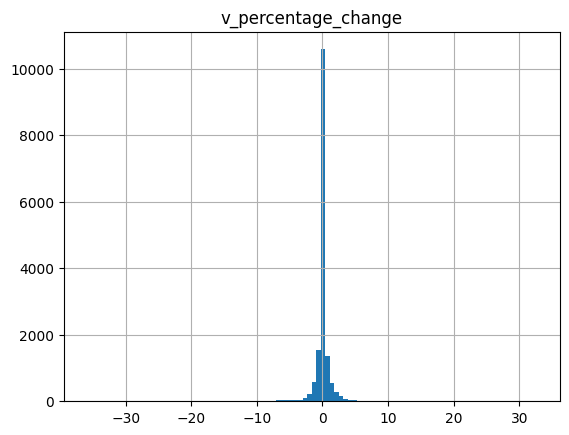

In [64]:
res_df[['v_percentage_change']].dropna().hist(bins = 100)

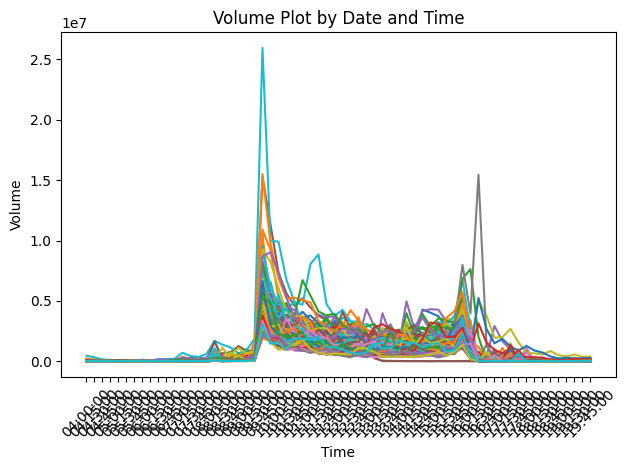

In [66]:
for date, group in res_df.groupby(res_df.date):
    # Assuming time is now represented as hours and minutes for simplicity in plotting
    plt.plot(group.time, group['v'], label=f'Date: {date}')

plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume Plot by Date and Time')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
len(res)

1050

In [136]:
import numpy as np

In [137]:
res_dict['mean_vol'] = np.array(res_dict['v']) / np.array(res_dict['n'])
res_dict

In [149]:
for k in ['n']:
    plt.plot( [(i*1.0) for i in res_dict[k]],label = k)
plt.legend()    
plt.show()

KeyError: 'Volatility'

In [164]:
df_data['Log_Ret'] = np.log(df_data['c'] / df_data['c'].shift(1))
df_data['Volatility'] = df_data['Log_Ret'].rolling(window=10).std() * np.sqrt(10)
df_data['Volatility_Mean10'] = df_data['Volatility'].rolling(window=10).mean()
df_data['Volatility_Mean10Shift10'] = df_data['Volatility'].rolling(window=10).mean().shift(-10)

<Axes: >

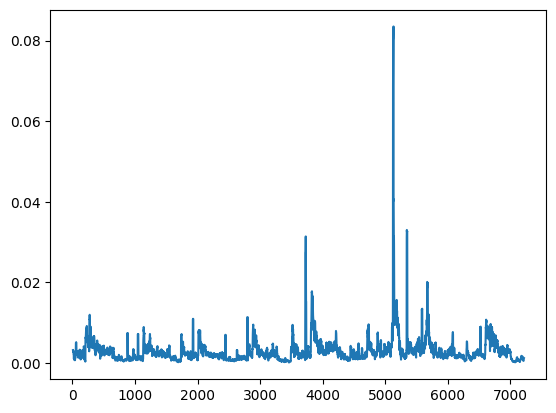

In [165]:
df_data['Volatility'].plot()

<Axes: >

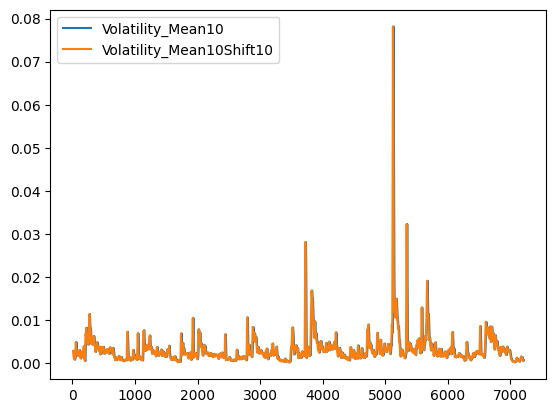

In [167]:
df_data[['Volatility_Mean10','Volatility_Mean10Shift10']].plot()

In [173]:
df_data['whale_trade'] = df_data.apply(lambda x:x['mean_vol']>100 and x['v'] > 10000,axis = 1) 

In [174]:
df_data_whale_trade = df_data[df_data['whale_trade']]

<Axes: >

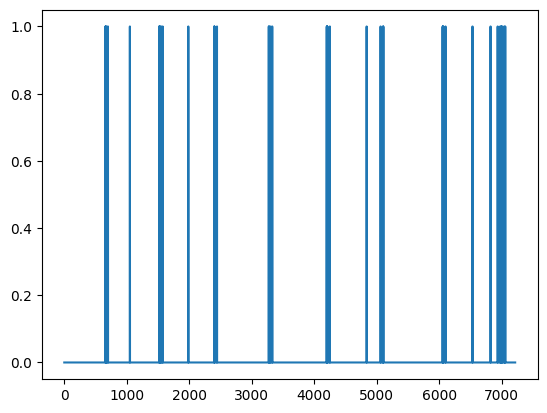

In [178]:
df_data['whale_trade'].astype(int).plot()

In [180]:
print(df_data[df_data['whale_trade']]['Volatility_Mean10Shift10'].mean())
print(df_data[~df_data['whale_trade']]['Volatility_Mean10Shift10'].mean())

0.0030366321285219032
0.003188909885603702


In [181]:
print(df_data[df_data['whale_trade']]['Volatility_Mean10Shift10'].std())
print(df_data[~df_data['whale_trade']]['Volatility_Mean10Shift10'].std())

0.0021661719175068658
0.0037879211852700945
